In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
!unzip -q AppleStock.zip

file_name = 'Apple Stock Prices (1981 to 2023).csv'

df = pd.read_csv(file_name)

print("INFO:")
print(df.info())

print("\nHEAD:")
print(df.head())

print("\nDESCRIBE:")
print(df.describe())

Saving AppleStock.zip to AppleStock.zip
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB
None

HEAD:
         Date      Open      High       Low     Close  Adj Close    Volume
0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
4  08/01/1981  0.135603  0.135603  

In [2]:
print("NULL VALUES PER COLUMN:")
print(df.isnull().sum())

print("\nDATA TYPES:")
print(df.dtypes)

NULL VALUES PER COLUMN:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

DATA TYPES:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

print(df['Date'].dtype)
print(df.head(3))

datetime64[ns]
        Date      Open      High       Low     Close  Adj Close    Volume
0 1981-01-02  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1 1981-01-05  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2 1981-01-06  0.144531  0.144531  0.143973  0.143973   0.112032  45158400


Frequency counts of days between records:
Date
1 days    8317
2 days      95
3 days    1927
4 days     265
5 days       2
7 days       1
Name: count, dtype: int64


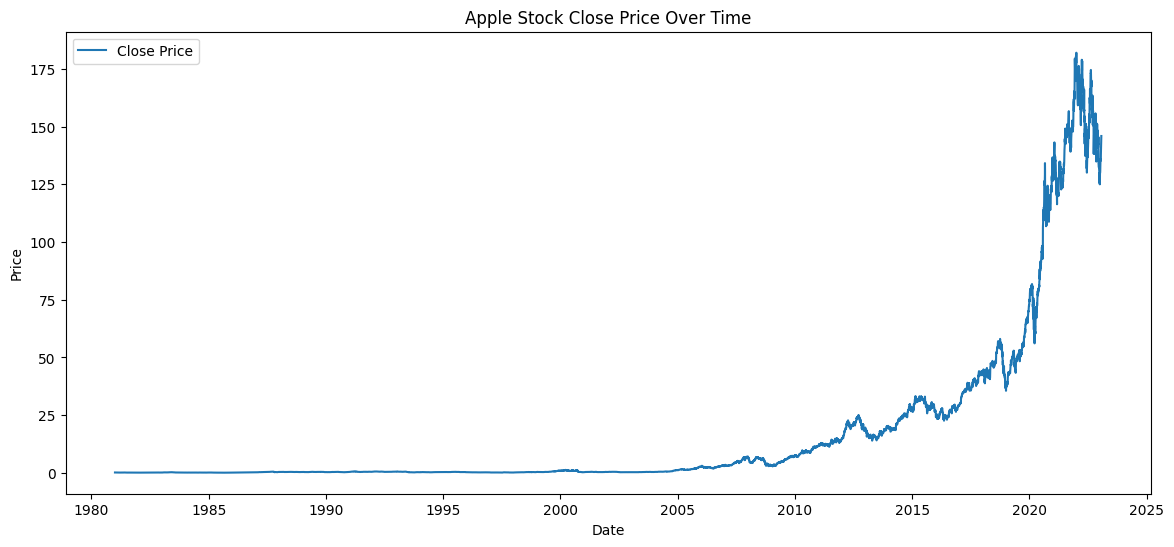

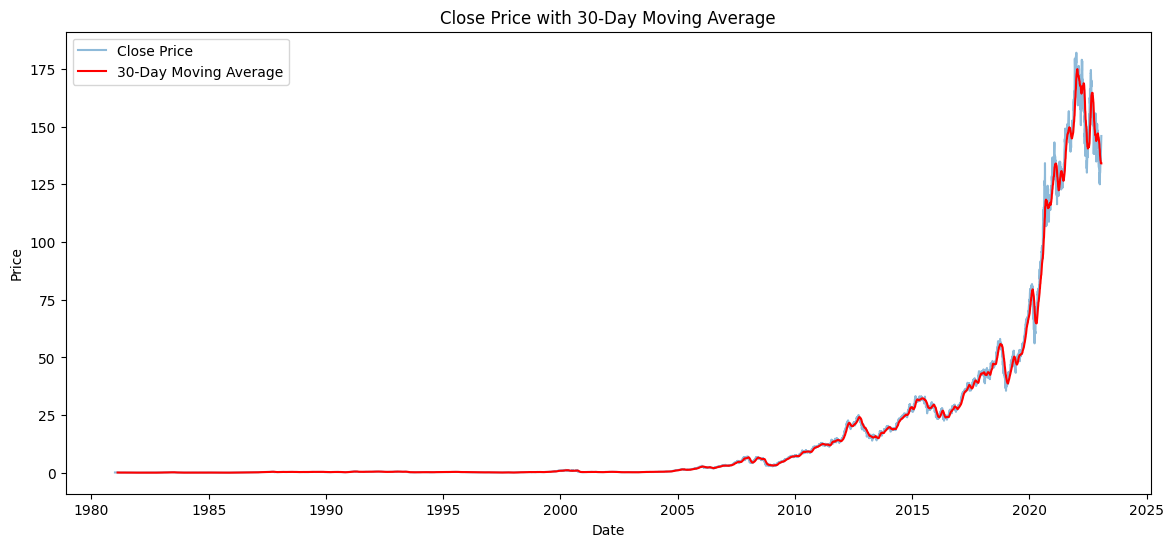

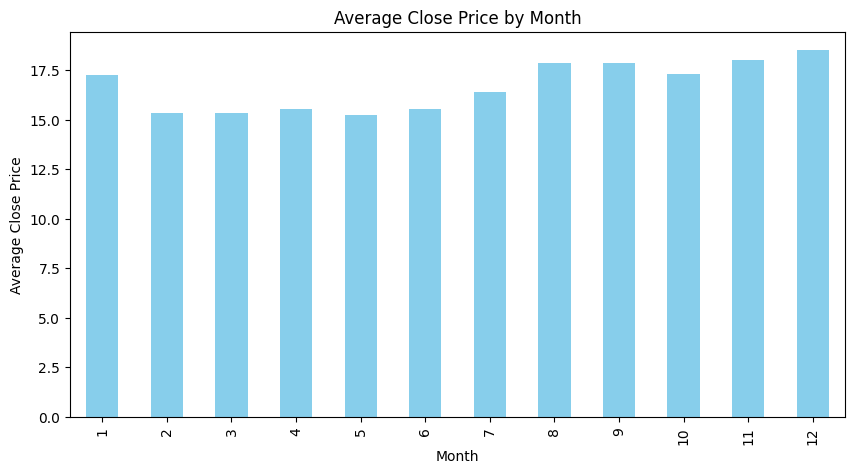

In [5]:
import matplotlib.pyplot as plt

# 1. Check frequency of data by calculating differences between consecutive dates
date_diffs = df['Date'].diff().dropna()  # differences between dates

print("Frequency counts of days between records:")
print(date_diffs.value_counts().sort_index())

# 2. Plot closing price over time to observe the trend
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Apple Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3. Calculate and plot 30-day moving average to smooth trend
df['Close_MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], alpha=0.5, label='Close Price')
plt.plot(df['Date'], df['Close_MA30'], color='red', label='30-Day Moving Average')
plt.title('Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 4. Optional: Average closing price by month to check seasonality
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()

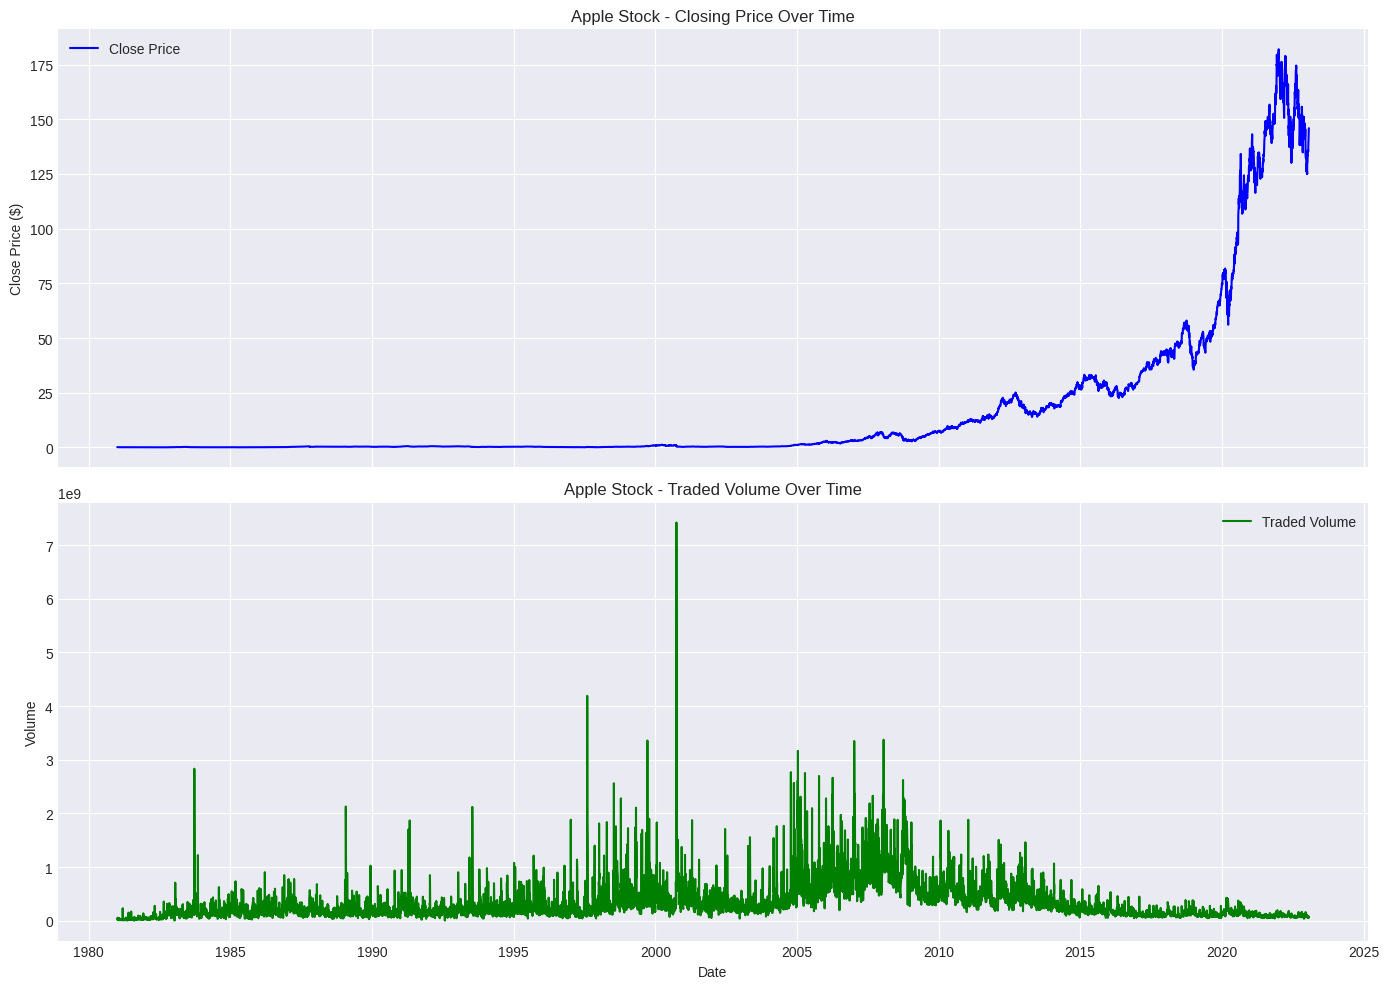

In [6]:
# Set the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Create a figure with two subplots (vertically stacked)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 1. Plot closing price over time
axs[0].plot(df['Date'], df['Close'], color='blue', label='Close Price')
axs[0].set_title('Apple Stock - Closing Price Over Time')
axs[0].set_ylabel('Close Price ($)')
axs[0].legend()

# 2. Plot traded volume over time
axs[1].plot(df['Date'], df['Volume'], color='green', label='Traded Volume')
axs[1].set_title('Apple Stock - Traded Volume Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# List of columns to analyze
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Compute mean
mean_values = df[cols].mean()

# Compute median
median_values = df[cols].median()

# Compute standard deviation
std_values = df[cols].std()

# Display results
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard Deviation:\n", std_values)

Mean values:
 Open         1.668917e+01
High         1.687996e+01
Low          1.650082e+01
Close        1.669736e+01
Adj Close    1.602735e+01
Volume       3.275098e+08
dtype: float64

Median values:
 Open         4.888390e-01
High         4.955360e-01
Low          4.804465e-01
Close        4.877010e-01
Adj Close    4.048505e-01
Volume       2.145976e+08
dtype: float64

Standard Deviation:
 Open         3.545052e+01
High         3.588285e+01
Low          3.503129e+01
Close        3.547391e+01
Adj Close    3.515488e+01
Volume       3.378203e+08
dtype: float64


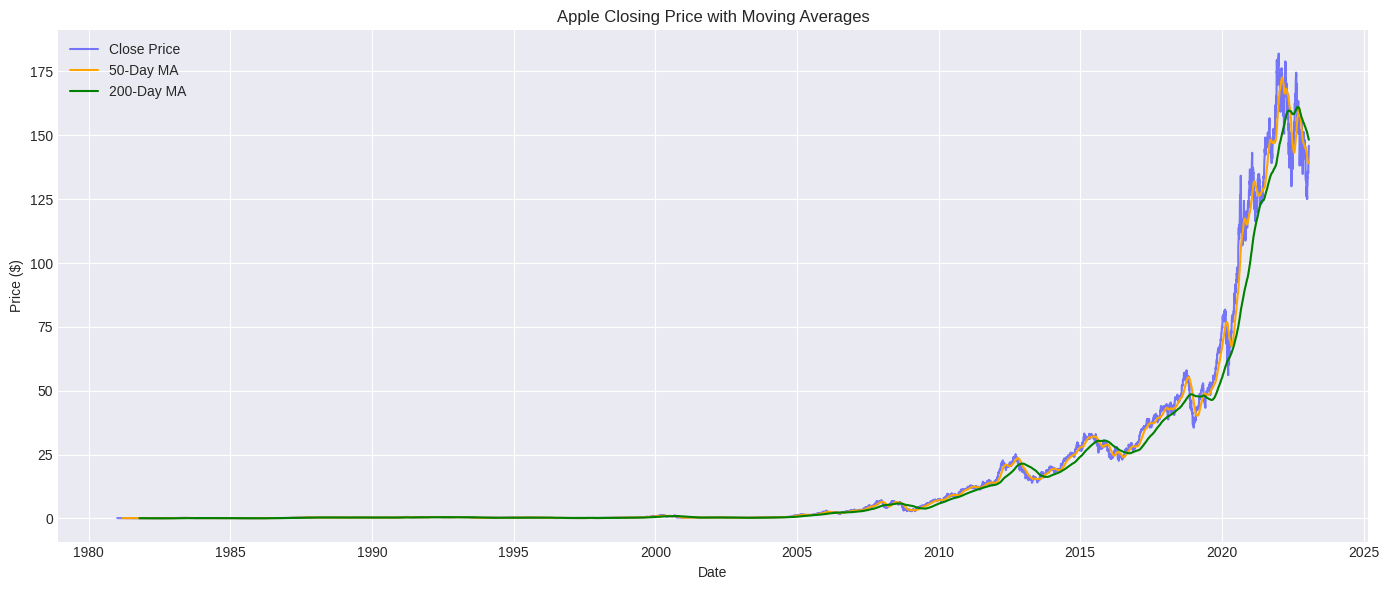

In [13]:
# Create moving average columns
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot the closing price with moving averages
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='green')
plt.title('Apple Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()


The analysis of the chart with overlaid 50-day (MA50) and 200-day (MA200) moving averages reveals key trend changes in Apple stock prices.

Notably, when MA50 crosses above MA200 (known as a "Golden Cross"), it often signals the beginning of a long-term upward trend. Conversely, when MA50 crosses below MA200 (a "Death Cross"), it tends to precede a downward trend.

These crossover points serve as important indicators and confirm that moving averages can be effective tools for identifying and analyzing market trends.


In [14]:
from scipy import stats

# Create 'Year' column from 'Date'
df['Year'] = df['Date'].dt.year

# Calculate average closing prices by year
avg_close_per_year = df.groupby('Year')['Close'].mean()
print("Average closing price per year:\n", avg_close_per_year.head())

# Select two years for comparison (example: 2000 and 2010)
close_2000 = df[df['Year'] == 2000]['Close']
close_2010 = df[df['Year'] == 2010]['Close']

# Perform independent two-sample t-test
t_stat, p_val = stats.ttest_ind(close_2000, close_2010, equal_var=False)
print(f"\nT-test comparing closing prices of 2000 vs 2010:\n t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

Average closing price per year:
 Year
1981    0.108548
1982    0.085459
1983    0.167274
1984    0.119651
1985    0.090233
Name: Close, dtype: float64

T-test comparing closing prices of 2000 vs 2010:
 t-statistic = -97.7371, p-value = 0.0000


The average closing price of Apple stock differs significantly between the years 2000 and 2010. The very low p-value (less than 0.05, practically zero) indicates that the difference in means is statistically significant and unlikely due to random chance.

The negative t-statistic shows that the mean closing price in 2000 was much lower than in 2010, which makes sense given the stock price growth during that period.

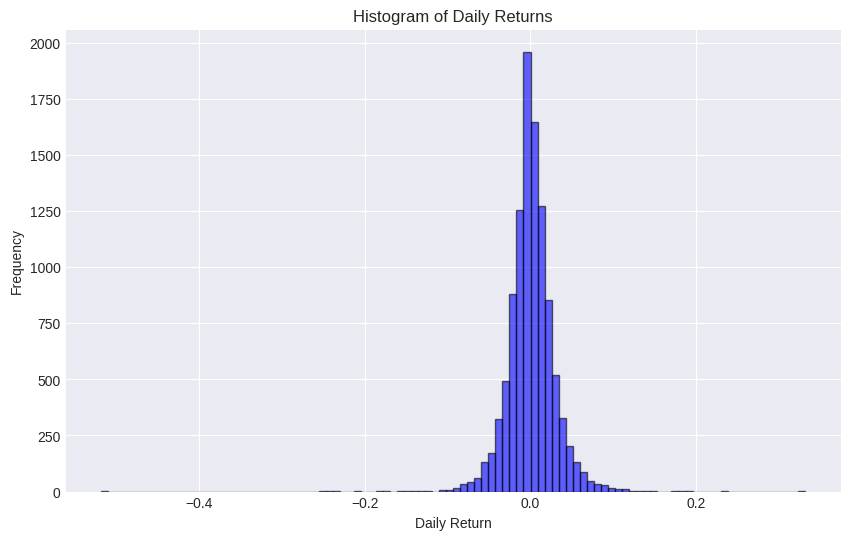

Shapiro-Wilk test for normality:
Statistic = 0.9532, p-value = 0.0000
Reject the null hypothesis: Daily returns are NOT normally distributed.


In [15]:
# Calculate daily returns as percentage change in 'Close' price
df['Daily_Return'] = df['Close'].pct_change()

# Drop NaN values resulted from pct_change
daily_returns = df['Daily_Return'].dropna()

# Plot histogram of daily returns
plt.figure(figsize=(10,6))
plt.hist(daily_returns, bins=100, alpha=0.6, color='blue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Perform Shapiro-Wilk test for normality (sampling 5000 points to speed up test)
stat, p = stats.shapiro(daily_returns.sample(5000, random_state=42))
print(f"Shapiro-Wilk test for normality:\nStatistic = {stat:.4f}, p-value = {p:.4f}")

if p > 0.05:
    print("Fail to reject the null hypothesis: Daily returns are normally distributed.")
else:
    print("Reject the null hypothesis: Daily returns are NOT normally distributed.")

The Shapiro-Wilk test results show a statistic of 0.9532 and a very small p-value (practically zero). This means we reject the null hypothesis of normality.

Conclusion: the distribution of daily returns is NOT normally distributed. In other words, the data do not follow the classic bell-shaped curve.

In [16]:
import numpy as np

# Calculate moving averages using np.convolve for Close price with different windows
window_50 = 50
window_200 = 200

# Create moving average arrays using convolution (mode='valid' gives the valid part without zero padding)
ma_50 = np.convolve(df['Close'], np.ones(window_50)/window_50, mode='valid')
ma_200 = np.convolve(df['Close'], np.ones(window_200)/window_200, mode='valid')

# For Volume, let's calculate a moving average too with window 50
vol_ma_50 = np.convolve(df['Volume'], np.ones(window_50)/window_50, mode='valid')

# Since ma_50, ma_200, and vol_ma_50 are shorter arrays due to 'valid' mode,
# align lengths by trimming longer arrays to the shortest length
min_len = min(len(ma_50), len(ma_200), len(vol_ma_50))
ma_50 = ma_50[-min_len:]
ma_200 = ma_200[-min_len:]
vol_ma_50 = vol_ma_50[-min_len:]

# Calculate correlations between moving averages
corr_ma50_ma200 = np.corrcoef(ma_50, ma_200)[0, 1]
corr_ma50_vol = np.corrcoef(ma_50, vol_ma_50)[0, 1]
corr_ma200_vol = np.corrcoef(ma_200, vol_ma_50)[0, 1]

print(f"Correlation between MA50 and MA200: {corr_ma50_ma200:.4f}")
print(f"Correlation between MA50 and Volume MA50: {corr_ma50_vol:.4f}")
print(f"Correlation between MA200 and Volume MA50: {corr_ma200_vol:.4f}")

Correlation between MA50 and MA200: 0.9949
Correlation between MA50 and Volume MA50: -0.2881
Correlation between MA200 and Volume MA50: -0.2869


There is a very strong positive correlation (0.9949) between the 50-day and 200-day moving averages of closing prices, indicating these two lines move almost synchronously and reflect the overall price trend.

The negative correlations between the 50-day MA of price and 50-day MA of trading volume (-0.2881), as well as between the 200-day MA and volume (-0.2869), suggest that when the price increases, trading volume tends to decrease, and vice versa. This relationship is moderate but noticeable.